# Credit Card Transactions Fraud Detection

In [1]:
# Task 2

# Build a model to detect fraudulent credit card transactions. 
# Use a dataset containing information about credit card transactions, and experiment with algorithms like 
# Logistic Regression, Decision Trees,or Random Forests to classify transactions as fraudulent or legitimate.

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from matplotlib import pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import plotly.express as px
import seaborn as sns

In [3]:
# Load train dataset
train_data = pd.read_csv(
    r"C:\Users\Michel Diego\Downloads\credit_card_fraud_detection\fraudTrain.csv"
)

In [4]:
# Sampling dataset

sample_size = 0.15
df, _ = train_test_split(train_data, test_size = 1-sample_size,stratify=train_data['is_fraud'], random_state=42)

In [5]:
# Dataset shape

df.shape

(194501, 23)

In [6]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
398918,398918,2019-06-30 18:37:50,377654590313960,fraud_Bode-Schuster,kids_pets,55.05,Lawrence,Davis,M,7421 Serrano Lane Apt. 580,...,36.0435,-84.0400,25459,"Teacher, special educational needs",1969-02-22,2b362b0b448963092065fb8e6c38ce8d,1341081470,36.175640,-84.646341,0
655541,655541,2019-10-06 12:02:58,4956828990005111019,fraud_Block Group,misc_pos,3.03,Kenneth,Robinson,M,269 Sanchez Rapids,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,6387314112483e8206f351961340d7ce,1349524978,40.939505,-74.256242,0
911788,911788,2019-12-29 10:56:07,4788103653396,fraud_Nienow PLC,entertainment,139.01,Kristin,Williams,F,36366 Smith Road,...,39.6321,-84.2675,36784,"Investment banker, corporate",1941-07-31,aa1d02f505bae2761149afd24ec4d72d,1356778567,39.822635,-84.105583,0
86389,86389,2019-02-20 04:55:42,377264520876399,fraud_Bernhard Inc,gas_transport,55.74,Kara,Miles,F,2076 Thomas Roads Suite 970,...,34.3424,-80.5000,4424,Lawyer,1961-07-31,e4e7b653235656a211fe759f1abf5cba,1329713742,34.962050,-80.168628,0
289156,289156,2019-05-22 09:41:58,4155021259183870,fraud_Doyle Ltd,grocery_pos,93.78,Renee,Parrish,F,174 Jennifer Meadow Apt. 467,...,34.7032,-98.9591,540,Research scientist (life sciences),1983-10-12,9acd65e2601946fc132a9d64df5178ff,1337679718,34.068722,-98.940711,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084904,1084904,2020-03-26 22:03:48,4560004149983868183,"fraud_Kihn, Brakus and Goyette",personal_care,38.94,Stacy,Villegas,F,20581 Pena Walks,...,38.8881,-104.6556,525713,Museum/gallery exhibitions officer,1992-05-09,f93f924d08a19064ec37de7a69cf8e4b,1364335428,38.648246,-104.969889,0
78785,78785,2019-02-16 14:20:54,378904938837132,fraud_Gerhold LLC,home,29.43,Tina,Zimmerman,F,3595 Susan Island Suite 063,...,35.7382,-98.7388,1675,Barrister,1986-05-01,12177fa4ce00fc361366c28e0af96b81,1329402054,35.110496,-98.246154,0
1151888,1151888,2020-04-25 18:11:52,4169759661243568,fraud_Abernathy and Sons,food_dining,64.98,Jamie,Carr,F,55363 Aaron Circle Suite 450,...,40.2236,-76.5380,213,Special educational needs teacher,1972-02-15,2a12827950e508d617add087df49687a,1366913512,40.191038,-77.350918,0
382538,382538,2019-06-24 14:53:14,4155021259183870,fraud_Stark-Batz,entertainment,3.49,Renee,Parrish,F,174 Jennifer Meadow Apt. 467,...,34.7032,-98.9591,540,Research scientist (life sciences),1983-10-12,4a248f9b8268ba53241625b4af2a271c,1340549594,35.135938,-98.112255,0


In [7]:
#Dropping 'Unnamed' column

df = df.drop(df.columns[0], axis =1)

In [8]:
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

No missing values

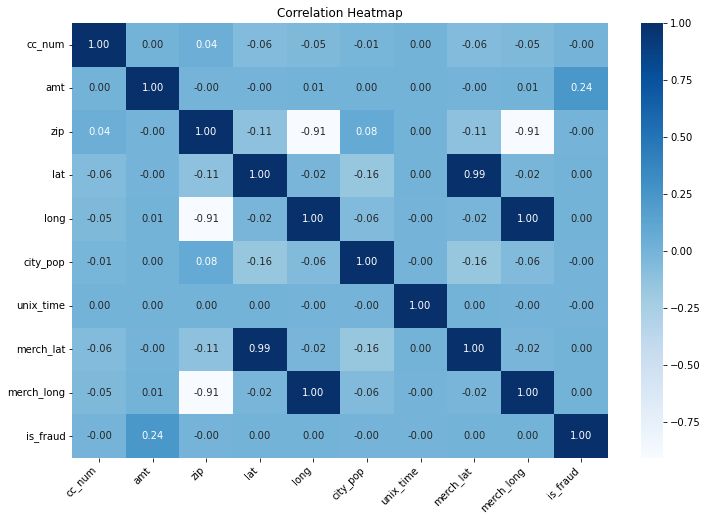

In [9]:
# Correlation map

# Compute correlation matrix
cor_mat = df.corr()

# Create the heatmap with Seaborn
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(cor_mat, cmap="Blues", annot=True, fmt=".2f", cbar=True, xticklabels=True, yticklabels=True)

# Customize ticks
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title("Correlation Heatmap")  # Add a title

plt.show()


As we can see, most of columns has little correlation to "is_fraud". 
The "amt" column show some correlation to "is_fraud" column

# Adding cat column

In [10]:
df['is_fraud_cat'] = df['is_fraud'].apply(lambda x: "Fraud" if x==1 else "No Fraud")

In [11]:
df['is_fraud_cat']

398918     No Fraud
655541     No Fraud
911788     No Fraud
86389      No Fraud
289156     No Fraud
             ...   
1084904    No Fraud
78785      No Fraud
1151888    No Fraud
382538     No Fraud
375392     No Fraud
Name: is_fraud_cat, Length: 194501, dtype: object

In [12]:
fraud_counts = df['is_fraud_cat'].value_counts()
fraud_counts

No Fraud    193375
Fraud         1126
Name: is_fraud_cat, dtype: int64

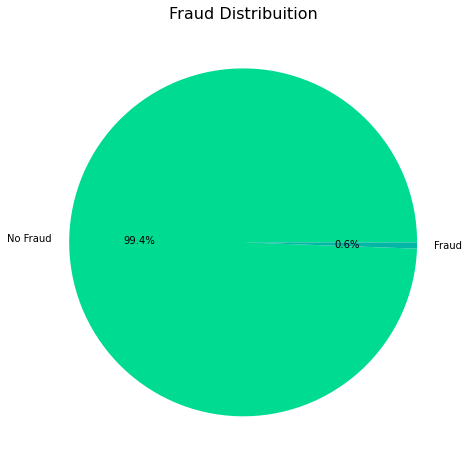

In [13]:
# Fraud Distribuition

plt.figure(figsize=(8,8))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%',
       colors=sns.color_palette('winter_r'))

plt.title("Fraud Distribuition", fontsize=16)


plt.show()

In [14]:
fraud = df[df.is_fraud == 1]
not_fraud = df[df.is_fraud == 0]

In [15]:
# Adding cat values

cat_fraud = fraud.category.value_counts().reset_index()
cat_fraud.columns = ["category", "counts"]
cat_not_fraud = not_fraud.category.value_counts().reset_index()
cat_not_fraud.columns = ["category", "counts"]
cat_not_fraud

,category,counts
0,gas_transport,19610
1,home,18508
2,grocery_pos,18327
3,shopping_pos,17267
4,kids_pets,16937
5,shopping_net,14319
6,entertainment,14138
7,personal_care,13657
8,food_dining,13567
9,health_fitness,12983


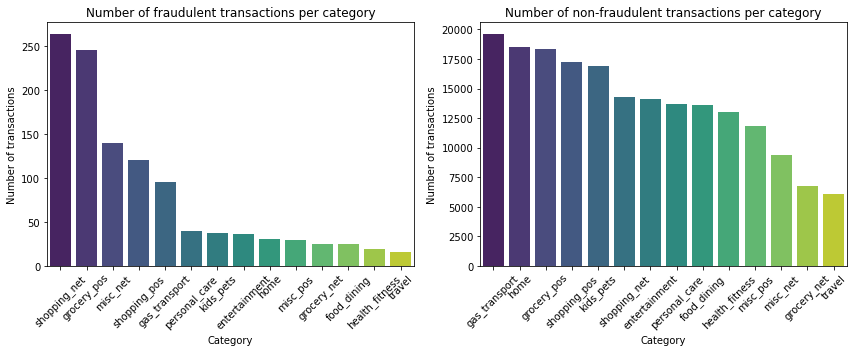

In [16]:
#Fraud by Transaction Category

# Creating a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the number of fraudulent and non-fraudulent transactions per category
sns.barplot(x="category", y="counts", data=cat_fraud, ax=axes[0], palette='viridis')
axes[0].set_title("Number of fraudulent transactions per category")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Number of transactions")
axes[0].tick_params(axis="x", rotation=45)

sns.barplot(x="category", y="counts", data=cat_not_fraud, ax=axes[1], palette='viridis')
axes[1].set_title("Number of non-fraudulent transactions per category")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Number of transactions")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()

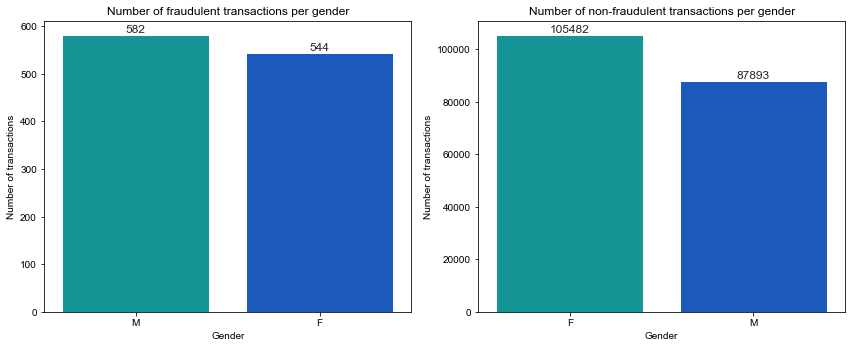

In [17]:
# Creating a 1x2 grid for subplots

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

# Getting the counts of fraudulent and non-fraudulent activities per gender
g_fraud = fraud.gender.value_counts().reset_index()
g_fraud.columns = ["Gender", "Counts"]
g_not_fraud = not_fraud.gender.value_counts().reset_index()
g_not_fraud.columns = ["Gender", "Counts"]

# Plotting the number of fraudulent and non-fraudulent transactions per gender
sns.barplot(x="Gender", y="Counts", data=g_fraud, ax=axes[0], palette='winter_r')
axes[0].set_title("Number of fraudulent transactions per gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Gender", y="Counts", data=g_not_fraud, ax=axes[1], palette='winter_r')
axes[1].set_title("Number of non-fraudulent transactions per gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

We notice that there is no significant differences between the number of fraud victims with respect to gender. Women are involved in more transactions than men - 709863 transactions for the former compared to 586812 for the latter. Hence, around 0.64% of transactions involving men are fraudulent compared to 0.53% for women.

# Creating bins age

In [18]:
# Extracting the transaction year

df["trans_year"] = pd.Series(pd.to_datetime(df.trans_date_trans_time)).dt.year

# Finding the birth year of each person

df["dob"] = pd.Series(pd.to_datetime(df.dob)).dt.year

In [19]:
# Calculating the age of each person and adding to train_data

age = pd.Series(df.trans_year - df.dob)
df["age"] = age

In [20]:
# Dividing individuals into age_groups

bins = [10, 18, 35, 60, 100]
labels = ["14-18", "18-35", "35-60", "60+"]
df["age_group"] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [21]:
# Extracting fraudulent and non-fraudulent transactions by age_group

age_fraud = df[df.is_fraud == 1].age_group.value_counts().reset_index()
age_fraud.columns = ["Age group", "Counts"]
age_not_fraud = df[df.is_fraud == 0].age_group.value_counts().reset_index()
age_not_fraud.columns = ["Age group", "Counts"]

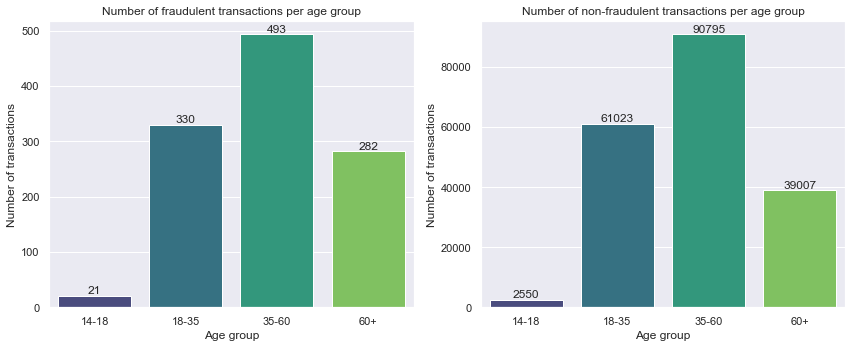

In [22]:
# Creating a 1x2 grid for subplots

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

# Plotting the number of fraudulent and non-fraudulent transactions per gender
sns.barplot(x="Age group", y="Counts", data=age_fraud, ax=axes[0], palette='viridis')
axes[0].set_title("Number of fraudulent transactions per age group")
axes[0].set_xlabel("Age group")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Age group", y="Counts", data=age_not_fraud, ax=axes[1], palette='viridis')
axes[1].set_title("Number of non-fraudulent transactions per age group")
axes[1].set_xlabel("Age group")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

We notice that teenagers are least likely to fall victim to credit card fraud. This might primarily be due to the considerably lower accessibility to credit cards for teenager compared to older individuals.

It is people in middle age groups who are more susceptible to credit card fraud as shown by the bar chart which might be explained by the the higher usage of credit cards within that age group.

The percentage of fraudulent transactions is highest among the people aged 60 or higher. This might be due to lower digital literacy.

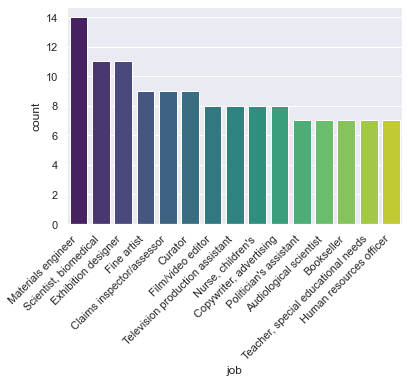

In [23]:
job_counts = df[df['is_fraud_cat']=='Fraud']['job'].value_counts(ascending=False,sort=True).head(15).reset_index()
job_counts.columns = ['job','count']

sns.barplot(data = job_counts,
           x='job', y = 'count', palette='viridis')
plt.xticks(rotation = 45,ha = 'right')
plt.show()

In [24]:
df2 = df.drop_duplicates()
df2.shape

(194501, 26)

# Dummy Variables

Continuing to process our data for a models, we'll take a look at the categorical data and their number 
of unique values to determine which we should retain for dummy variables

In [25]:
# Dropping all remaining redundant columns

df3 = df2.drop(axis=1, columns=["dob", "trans_year", "trans_date_trans_time", 
                                "age","state", "merchant", "first", "last", "city", "zip", "lat", "long",
                               "cc_num", "street", "city_pop", "job", "trans_num", "unix_time",
                                "merch_lat", "merch_long"])

In [26]:
df3

,category,amt,gender,is_fraud,is_fraud_cat,age_group
398918,kids_pets,55.05,M,0,No Fraud,35-60
655541,misc_pos,3.03,M,0,No Fraud,35-60
911788,entertainment,139.01,F,0,No Fraud,60+
86389,gas_transport,55.74,F,0,No Fraud,35-60
289156,grocery_pos,93.78,F,0,No Fraud,35-60
...,...,...,...,...,...,...
1084904,personal_care,38.94,F,0,No Fraud,18-35
78785,home,29.43,F,0,No Fraud,18-35
1151888,food_dining,64.98,F,0,No Fraud,35-60
382538,entertainment,3.49,F,0,No Fraud,35-60


In [27]:
df3.drop(columns = ['is_fraud_cat'], axis = 1,  inplace = True)

In [28]:
df3

,category,amt,gender,is_fraud,age_group
398918,kids_pets,55.05,M,0,35-60
655541,misc_pos,3.03,M,0,35-60
911788,entertainment,139.01,F,0,60+
86389,gas_transport,55.74,F,0,35-60
289156,grocery_pos,93.78,F,0,35-60
...,...,...,...,...,...
1084904,personal_care,38.94,F,0,18-35
78785,home,29.43,F,0,18-35
1151888,food_dining,64.98,F,0,35-60
382538,entertainment,3.49,F,0,35-60


In [29]:
df3 = pd.get_dummies(df3)

In [30]:
df3

,amt,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,age_group_14-18,age_group_18-35,age_group_35-60,age_group_60+
398918,55.05,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
655541,3.03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
911788,139.01,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
86389,55.74,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
289156,93.78,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084904,38.94,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
78785,29.43,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1151888,64.98,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
382538,3.49,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Stratified Train/Test split
We need to generate a training / validation dataset split that will keep the same percentages of classes in each split

# Defining Features and Labels

In [31]:
# Defining Labels and Features

feature_X = df3.reset_index(drop='index').drop('is_fraud', axis=1)

label_y = df3.reset_index(drop='index')['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(feature_X, label_y, stratify=label_y, test_size = 0.3, random_state = 42)

In [32]:
# Training the Model

log_model = LogisticRegression(penalty="l2", fit_intercept=False, random_state=42)
log_model.fit(feature_X, label_y)

C:\Users\Michel Diego\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(fit_intercept=False, random_state=42)

# Starting Testing

In [33]:
# Loading Dataset Test

test_data = pd.read_csv(
    r"C:\Users\Michel Diego\Downloads\credit_card_fraud_detection\fraudTest.csv"
)

In [34]:
test_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [35]:
# Dropping 'Unnamed Column'

test_data.drop(columns = ["Unnamed: 0"], axis=1,
               inplace = True)

In [36]:
# Adding age group column 

test_data["trans_year"] = pd.Series(pd.to_datetime(test_data.trans_date_trans_time)).dt.year
test_data["dob"] = pd.Series(pd.to_datetime(test_data.dob)).dt.year

age = pd.Series(test_data.trans_year - test_data.dob)
test_data["age"] = age

bins = [10, 18, 35, 60, 100]
labels = ["14-18", "18-35", "35-60", "60+"]
test_data["age_group"] = pd.cut(test_data['age'], bins=bins, labels=labels, right=True)

In [37]:
test_data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year,age,age_group
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,Mechanical engineer,1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020,52,35-60
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,"Sales professional, IT",1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020,30,18-35
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,"Librarian, public",1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020,50,35-60
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,Set designer,1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020,33,18-35
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,Furniture designer,1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020,65,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,Town planner,1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,2020,54,35-60
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,Futures trader,1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,2020,21,18-35
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,Musician,1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,2020,39,35-60
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,Cartographer,1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,2020,55,35-60


In [38]:
# Dropping all remaining redundant columns

test_data.drop(axis=1, columns=["dob", "trans_year", "trans_date_trans_time", 
                                "age","state", "merchant", "first", "last", "city", "zip", "lat", "long",
                               "cc_num", "street", "city_pop", "job", "trans_num", "unix_time",
                                "merch_lat", "merch_long"], inplace=True)

In [39]:
test_data

,category,amt,gender,is_fraud,age_group
0,personal_care,2.86,M,0,35-60
1,personal_care,29.84,F,0,18-35
2,health_fitness,41.28,F,0,35-60
3,misc_pos,60.05,M,0,18-35
4,travel,3.19,M,0,60+
...,...,...,...,...,...
555714,health_fitness,43.77,M,0,35-60
555715,kids_pets,111.84,M,0,18-35
555716,kids_pets,86.88,F,0,35-60
555717,travel,7.99,M,0,35-60


In [40]:
# One hot encoding

test_data = pd.get_dummies(test_data)

In [41]:
test_data

,amt,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,age_group_14-18,age_group_18-35,age_group_35-60,age_group_60+
0,2.86,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,29.84,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,41.28,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,60.05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,3.19,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
555715,111.84,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
555716,86.88,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
555717,7.99,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [42]:
# Extracting features and label from test data

test_X = test_data.drop(axis=1, columns=["is_fraud"], inplace=False)
test_y = test_data["is_fraud"]

# Making predictions

pred = log_model.predict(test_X)

# Accuracy score

accuracy = accuracy_score(test_y, pred)
accuracy

0.9954797298634742

This is a very high accuracy score and it might be misleading due to the significant class imbalance in the dataset with non-fraudulent transactions naturally outnumbering fraudulent transactions. So we carry out some further investigations.

In [43]:
test_data["predictions"] = pred

In [44]:
test_data[test_data['is_fraud'] == 0].predictions.value_counts()

0    553207
1       367
Name: predictions, dtype: int64

In [45]:
# Adding predictions to dataset

test_data["predictions"] = pred

# Comparing the number of fraudulent transactions in the dataset and the number of such transactions predicted by the model

actual_fraud = test_data[test_data.is_fraud == 0].value_counts()
pred_fraud = test_data[test_data.is_fraud == 1].predictions.value_counts()[0]


actual_fraud, pred_fraud

(amt       is_fraud  category_entertainment  category_food_dining  category_gas_transport  category_grocery_net  category_grocery_pos  category_health_fitness  category_home  category_kids_pets  category_misc_net  category_misc_pos  category_personal_care  category_shopping_net  category_shopping_pos  category_travel  gender_F  gender_M  age_group_14-18  age_group_18-35  age_group_35-60  age_group_60+  predictions
 3.24      0         0                       0                     0                       0                     0                     0                        0              0                   0                  0                  0                       0                      1                      0                1         0         0                0                1                0              0              24
 1.76      0         0                       0                     0                       0                     0                     0                      

In [46]:
# Correctly count actual fraudulent transactions
actual_fraud_count = len(test_data[test_data.is_fraud == 1])

# Correctly count predicted fraudulent transactions
pred_fraud_count = len(test_data[test_data.predictions == 1])

# Return lengths
actual_fraud_count, pred_fraud_count



(2145, 367)

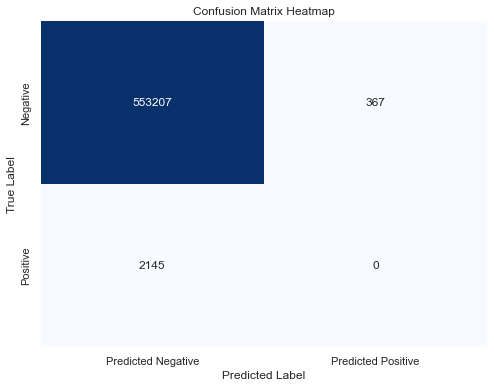

In [47]:
# Create the confusion matrix
cm = confusion_matrix(test_y, pred)  # Adjust labels based on the dataset

cm_df = pd.DataFrame(cm, index=["Negative", "Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


# Logistic Regression

In [48]:
# Fitting model

model2 = LogisticRegression(penalty="l2", fit_intercept=False, random_state=42, class_weight="balanced")
model2.fit(test_X, test_y)

C:\Users\Michel Diego\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', fit_intercept=False,
                   random_state=42)

In [49]:
# Making predictions

pred2 = model2.predict(test_X)

# Accuracy Score

accuracy2 = accuracy_score(test_y, pred2)
accuracy2

0.905286664663256

We have a much lower accuracy this time but this may be an indication that the bias resulting from the class imbalance has been mitigated. We plot the confusion matrix for a better idea.

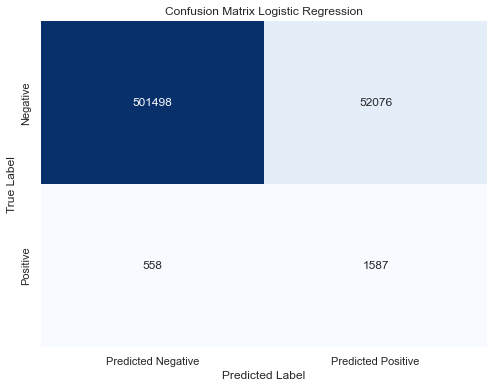

In [50]:
# Create the confusion matrix
cm2 = confusion_matrix(test_y, pred2)  

cm2_df = pd.DataFrame(cm2, index=["Negative", "Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm2_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Logistic Regression")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [51]:
# Fitting model

rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(test_X, test_y)

# Making predictions

rf_pred = rf.predict(test_X)

# Accuracy Score

accuracy = accuracy_score(test_y, rf_pred)
accuracy

0.9993018054088487

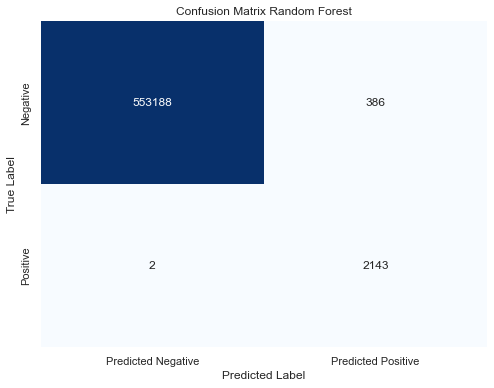

In [52]:
# Create the confusion matrix
cmr = confusion_matrix(test_y, rf_pred)  # Adjust labels based on the dataset

cmr_df = pd.DataFrame(cmr, index=["Negative", "Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cmr_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Random Forest")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


Breakdown of the Quadrants:
    
Top-Left Quadrant (True Negative - TN):

Definition: The model correctly predicted the negative class.
Example: Predicting "Not Fraud" when the actual class is "Not Fraud."
    
Top-Right Quadrant (False Positive - FP):

Definition: The model incorrectly predicted the positive class.
Example: Predicting "Fraud" when the actual class is "Not Fraud."
Impact: Increases false alarms, potentially causing unnecessary actions.
    
Bottom-Left Quadrant (False Negative - FN):

Definition: The model incorrectly predicted the negative class.
Example: Predicting "Not Fraud" when the actual class is "Fraud."
Impact: Misses positive cases, potentially the most critical error in some contexts (e.g., failing to detect fraud).
    
Bottom-Right Quadrant (True Positive - TP):

Definition: The model correctly predicted the positive class.
Example: Predicting "Fraud" when the actual class is "Fraud."
Impact: Represents the desired correct classification for the positive class.

The Random Forest model is far superior to the logistic regression model both in terms of accuracy and its handling of the class imbalance by minimising the number of false negatives and false positives.